## 1. Ejemplo de clasificación con KNN
#Identificación de Sargazo

Infirmación tomada del artículo ERISNet: deep neural network for
Sargassum detection along the coastline
of the Mexican Caribbean
https://peerj.com/preprints/27445v1/#supp-1


Número de instancias: 4515

Atributos : 14

Output: Sargazo o No sargazo

#2. Importación de librerías y montando google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os

In [3]:
from sklearn.preprocessing import LabelEncoder #Codificación de etiquetas
from sklearn.preprocessing import MinMaxScaler, StandardScaler #Escaladores
from sklearn.model_selection import train_test_split #holdout validation
from sklearn.metrics import confusion_matrix, accuracy_score 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor

In [4]:
path = r'/content/drive/Shareddrives/Data Science para Geociencias/6. Métodos de ML/6.6 K-vecinos cercanos'
dataset_path = os.path.join(path,'sargazo.csv')

# 3. Lectura y visualuzación del dataset

In [5]:
train_df = pd.read_csv(dataset_path)
clases = train_df['label'].unique()
train_df.dropna(axis=0, inplace=True)
train_df

,rhos_412,rhos_469,rhos_555,rhos_645,rhos_859,rhos_1240,rhos_2130,rhot_412,rhot_469,rhot_555,rhot_645,rhot_859,rhot_1240,rhot_2130,label
0,0.052152,0.052925,0.078956,0.059047,0.313018,0.221179,0.055593,0.145013,0.109765,0.098671,0.070267,0.314117,0.221700,0.055711,sargasso
1,0.071715,0.078672,0.105367,0.094236,0.312824,0.239947,0.055137,0.159696,0.131188,0.121568,0.102363,0.313924,0.240425,0.055256,sargasso
2,0.093493,0.103664,0.130337,0.125554,0.298491,0.258938,0.109737,0.176205,0.152149,0.143309,0.131019,0.299732,0.259376,0.109834,sargasso
3,0.116702,0.132209,0.161380,0.137303,0.256020,0.209399,0.107257,0.194006,0.176303,0.170476,0.141800,0.257693,0.209948,0.107355,sargasso
4,0.180689,0.212103,0.230556,0.184178,0.181868,0.180037,0.167550,0.241338,0.241300,0.229111,0.184354,0.184206,0.175584,0.141222,sargasso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,0.143806,0.143242,0.164001,0.124509,0.264212,0.176977,0.053057,0.311553,0.249049,0.199440,0.145384,0.270519,0.178814,0.053340,nosargasso
4511,0.143806,0.143242,0.164001,0.124509,0.264212,0.176977,0.053057,0.311553,0.249049,0.199440,0.145384,0.270519,0.178814,0.053340,nosargasso
4512,0.123276,0.117157,0.119024,0.094688,0.121894,0.066987,0.034442,0.297634,0.228707,0.162350,0.119091,0.131016,0.069325,0.034737,nosargasso
4513,0.104469,0.101257,0.117801,0.095885,0.142425,0.115805,0.048879,0.284065,0.215838,0.161174,0.120053,0.151072,0.117905,0.049164,nosargasso


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


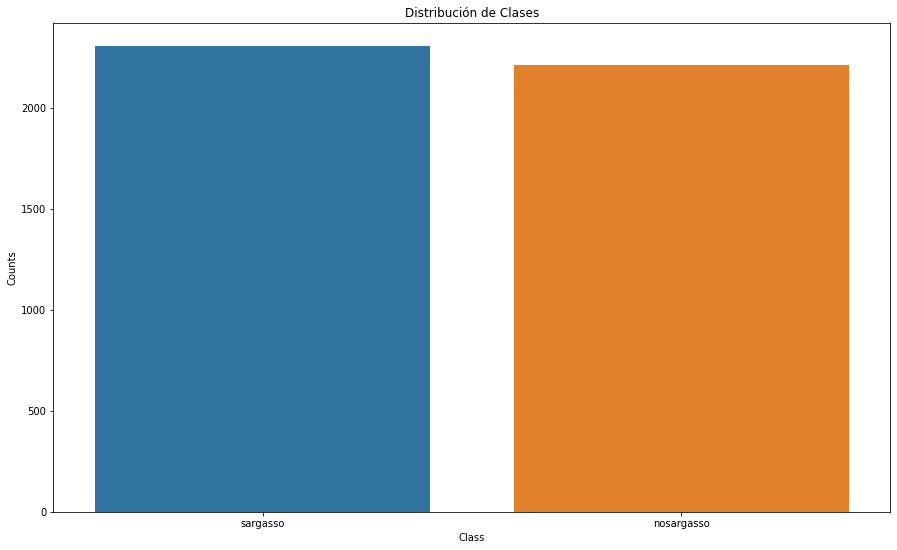

In [6]:
plt.figure(figsize=(15, 9))
sns.countplot('label',data=train_df)
plt.title('Distribución de Clases')
plt.xlabel('Class')
plt.ylabel('Counts')

plt.show()

In [7]:
train_df.describe()

,rhos_412,rhos_469,rhos_555,rhos_645,rhos_859,rhos_1240,rhos_2130,rhot_412,rhot_469,rhot_555,rhot_645,rhot_859,rhot_1240,rhot_2130
count,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000
mean,0.122820,0.127745,0.137024,0.120458,0.237361,0.220667,0.084654,0.228093,0.193223,0.158189,0.131515,0.241059,0.220572,0.081226
std,0.099040,0.113443,0.114513,0.117232,0.159549,0.151039,0.062435,0.086233,0.102083,0.101627,0.108274,0.157585,0.150845,0.061816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.006875,0.002568,0.000000,0.067569,0.037865,0.021898,0.000000,0.008451,0.002286
25%,0.063862,0.059743,0.064679,0.049532,0.066869,0.059875,0.037461,0.172535,0.131263,0.091679,0.065713,0.072419,0.059442,0.033245
50%,0.088020,0.086757,0.099789,0.079284,0.258462,0.235377,0.074158,0.201265,0.162694,0.126846,0.095211,0.260655,0.234751,0.070998
75%,0.142885,0.154681,0.170507,0.150535,0.363032,0.351262,0.113284,0.260026,0.216575,0.188004,0.158611,0.365852,0.351374,0.110195
max,0.758085,0.963065,0.976172,0.990578,0.807875,0.753128,0.492851,0.663777,0.993803,0.935407,0.969873,0.800670,0.753770,0.425098


#4. Escalamiento

In [8]:
scaler = StandardScaler()
train_df.loc[:, train_df.columns != 'label'] = scaler.fit_transform(train_df.loc[:, train_df.columns != 'label'])

#5. Codificación de etiquetas

In [9]:
le = LabelEncoder()
train_df['label'] = le.fit_transform(train_df.label.values)
train_df

,rhos_412,rhos_469,rhos_555,rhos_645,rhos_859,rhos_1240,rhos_2130,rhot_412,rhot_469,rhot_555,rhot_645,rhot_859,rhot_1240,rhot_2130,label
0,-0.713605,-0.659611,-0.507138,-0.523891,0.474240,0.003391,-0.465529,-0.963550,-0.817641,-0.585717,-0.565743,0.463663,0.007479,-0.412810,1
1,-0.516059,-0.432624,-0.276477,-0.223698,0.473026,0.127667,-0.472821,-0.793255,-0.607753,-0.360391,-0.269267,0.462438,0.131630,-0.420173,1
2,-0.296146,-0.212290,-0.058396,0.043473,0.383182,0.253415,0.401786,-0.601786,-0.402402,-0.146432,-0.004577,0.372365,0.257271,0.462832,1
3,-0.061781,0.039361,0.212714,0.143711,0.116957,-0.074611,0.362061,-0.395335,-0.165762,0.120915,0.095007,0.105565,-0.070437,0.422725,1
4,0.584369,0.743703,0.816867,0.543601,-0.347850,-0.269030,1.327858,0.153618,0.471015,0.697937,0.488066,-0.360817,-0.298268,0.970657,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,0.211922,0.136624,0.235608,0.034564,0.168306,-0.289297,-0.506152,0.967960,0.546934,0.405951,0.128107,0.186968,-0.276856,-0.451165,0
4511,0.211922,0.136624,0.235608,0.034564,0.168306,-0.289297,-0.506152,0.967960,0.546934,0.405951,0.128107,0.186968,-0.276856,-0.451165,0
4512,0.004607,-0.093336,-0.157203,-0.219843,-0.723789,-1.017597,-0.804336,0.806520,0.347644,0.040946,-0.114754,-0.698384,-1.002769,-0.752138,0
4513,-0.185306,-0.233512,-0.167883,-0.209626,-0.595097,-0.694345,-0.573077,0.649150,0.221564,0.029377,-0.105873,-0.571100,-0.680683,-0.518725,0


##6.Detección de outliers

In [10]:
lof = LocalOutlierFactor(n_neighbors=20, metric='euclidean')
yhat = lof.fit_predict(train_df)
# select all rows that are not outliers
mask = yhat != -1
train_df= train_df.loc[mask, :]


print('Número de outliers detectados', (~mask).sum())
train_df

Número de outliers detectados 271


,rhos_412,rhos_469,rhos_555,rhos_645,rhos_859,rhos_1240,rhos_2130,rhot_412,rhot_469,rhot_555,rhot_645,rhot_859,rhot_1240,rhot_2130,label
0,-0.713605,-0.659611,-0.507138,-0.523891,0.474240,0.003391,-0.465529,-0.963550,-0.817641,-0.585717,-0.565743,0.463663,0.007479,-0.412810,1
1,-0.516059,-0.432624,-0.276477,-0.223698,0.473026,0.127667,-0.472821,-0.793255,-0.607753,-0.360391,-0.269267,0.462438,0.131630,-0.420173,1
2,-0.296146,-0.212290,-0.058396,0.043473,0.383182,0.253415,0.401786,-0.601786,-0.402402,-0.146432,-0.004577,0.372365,0.257271,0.462832,1
3,-0.061781,0.039361,0.212714,0.143711,0.116957,-0.074611,0.362061,-0.395335,-0.165762,0.120915,0.095007,0.105565,-0.070437,0.422725,1
4,0.584369,0.743703,0.816867,0.543601,-0.347850,-0.269030,1.327858,0.153618,0.471015,0.697937,0.488066,-0.360817,-0.298268,0.970657,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,0.211922,0.136624,0.235608,0.034564,0.168306,-0.289297,-0.506152,0.967960,0.546934,0.405951,0.128107,0.186968,-0.276856,-0.451165,0
4511,0.211922,0.136624,0.235608,0.034564,0.168306,-0.289297,-0.506152,0.967960,0.546934,0.405951,0.128107,0.186968,-0.276856,-0.451165,0
4512,0.004607,-0.093336,-0.157203,-0.219843,-0.723789,-1.017597,-0.804336,0.806520,0.347644,0.040946,-0.114754,-0.698384,-1.002769,-0.752138,0
4513,-0.185306,-0.233512,-0.167883,-0.209626,-0.595097,-0.694345,-0.573077,0.649150,0.221564,0.029377,-0.105873,-0.571100,-0.680683,-0.518725,0


#7. Dividiendo el dataset en entrenamiento y prueba

In [11]:
X = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify=y)


print(f'Dimension de los datos de entrenamiento {X_train.shape}')
print(f'Dimension de los datos de prueba {X_test.shape}')

Dimension de los datos de entrenamiento (3395, 14)
Dimension de los datos de prueba (849, 14)


#8. Selección del valor de k

(0.5, 1.0)

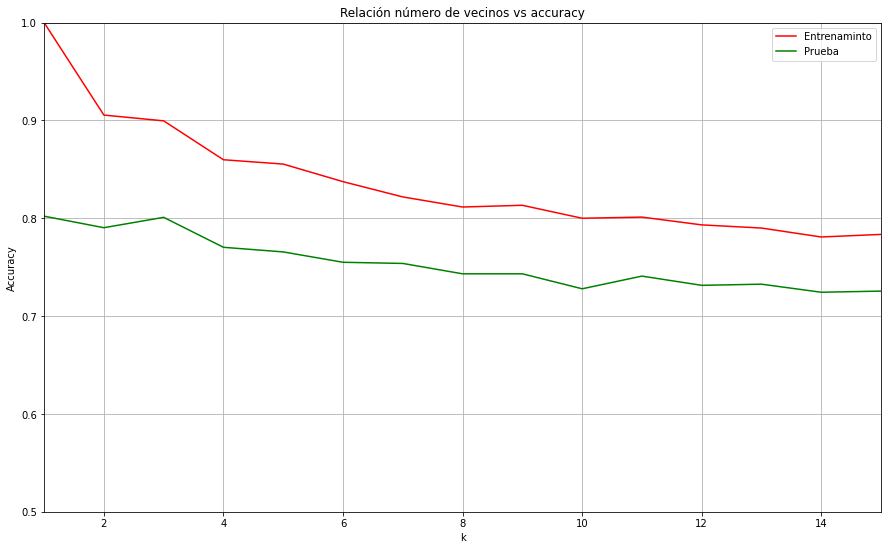

In [13]:
k_n = []
score_train = []
score_test = []

for i in range(15):
  classifier = KNeighborsClassifier(n_neighbors = i+1, metric = 'euclidean', p = 2)
  classifier.fit(X_train, y_train) #entrena
  y_pred = classifier.predict(X_test) #prueba
  score_t = classifier.score(X_train, y_train) #score train 
  score = accuracy_score(y_test, y_pred) #score test
  k_n.append(i+1)
  score_train.append(score_t)
  score_test.append(score)

plt.figure(figsize=(15, 9))
plt.plot(k_n,score_train, color = 'red')
plt.plot(k_n,score_test, color = 'green')
plt.title('Relación número de vecinos vs accuracy')
plt.legend(['Entrenaminto', 'Prueba'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xlim(np.min(k_n), np.max(k_n))
plt.ylim(0.5, 1)


#9. Entrenando el modelo de KNN con el valor de K óptimo

In [14]:
KNN = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean', p = 2)

KNN.fit(X_train, y_train)
KNN.score(X_train, y_train)

0.8995581737849779

#10. Prediciendo resultados

In [15]:
y_pred = KNN.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.800942285041225


In [16]:
#Funciones para MC y métricas
def plot_confusion_matrix(cm, classes, tit, normalize=False):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)
        title, fmt = 'Matriz de confusión normalizada', '.2f'
    else:
        title, fmt = tit, 'd'
    plt.figure(figsize=(10,8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)#, fontsize=12)
    plt.colorbar(pad=0.05)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=40)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Clase Verdadera')#, fontsize=10)
    plt.xlabel('Clase Predicha')#, fontsize=10)
    plt.savefig(title+'.png')
    #plt.grid(b=None)
    plt.show()
def sens_spec(cls_names, y_true, y_pred, pesos):
  sensitivity = []
  specificity = []
  prec=[]
  fscore = []
  sd = []
  for i,name in enumerate(cls_names):
    TP = np.sum((y_true==name) & (y_pred==name))
    TN = np.sum((y_true!=name) & (y_pred!=name))
    FP = np.sum((y_true!=name) & (y_pred==name))
    FN = np.sum((y_true==name) & (y_pred!=name))
    sensitivity.append(TP/(TP+FN))
    specificity.append(FP/(TN+FP))
    prec.append(TP/(TP+FP))
    fscore.append(2*(prec[i]*sensitivity[i])/(prec[i]+sensitivity[i]))
  sensitivity.append(sum([x*y for x,y in zip(sensitivity,pesos)]))
  specificity.append(sum([x*y for x,y in zip(specificity,pesos)]))
  prec.append(sum([x*y for x,y in zip(prec,pesos)]))
  fscore.append(sum([x*y for x,y in zip(fscore,pesos)]))
  for i in range(len(cls_names)):
    sd.append(np.sqrt((sensitivity[i]-sensitivity[-1])**2))
  sd.append(np.nan)
  return sensitivity, specificity, prec, fscore, sd

Matriz de confusión

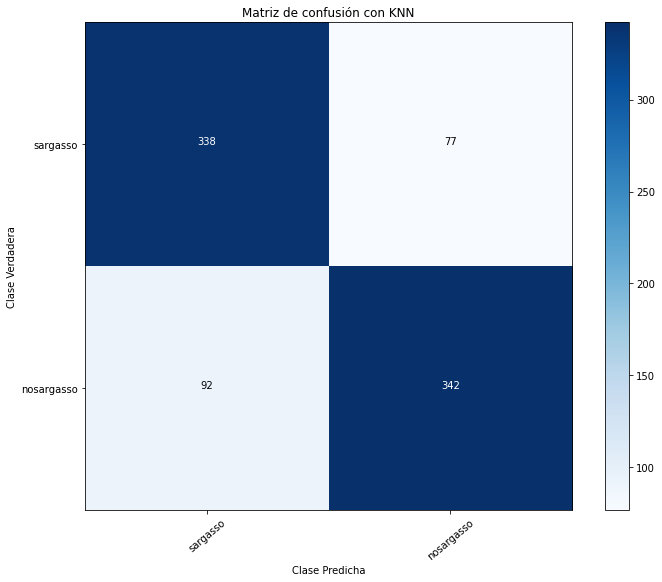

In [17]:
predictions = np.float32(y_pred)
true_labels = np.float32(y_test)
n_classes = 2
cnf_matrix = confusion_matrix(true_labels, predictions, labels=range(n_classes))
tit = 'Matriz de confusión con KNN'
plot_confusion_matrix(cnf_matrix,clases, tit, normalize=False)

In [18]:
pesos = train_df['label'].value_counts().sort_index().tolist()/ np.sum(train_df['label'].value_counts().tolist())
print(pesos)

[0.48868992 0.51131008]


Métricas por clase 

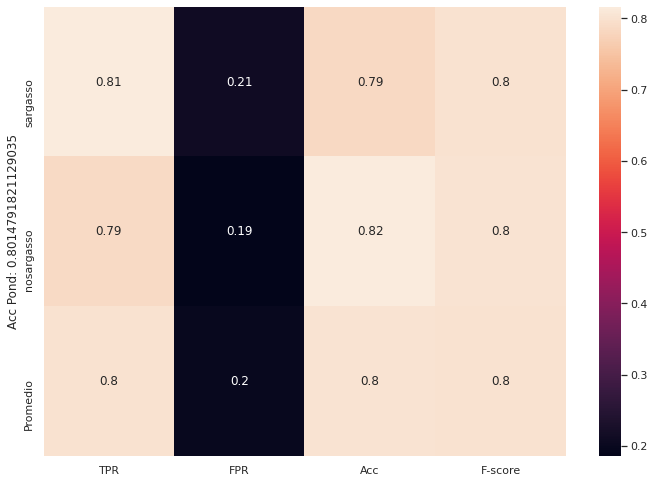

In [19]:
sensitivity, FPR, prec, fscore, sd = sens_spec(range(n_classes), true_labels, predictions, pesos)
d = {'TPR':sensitivity, 'FPR':FPR, 'Acc':prec, 'F-score':fscore}
ind = clases.tolist()+['Promedio']
df = pd.DataFrame(d, index=ind)#.transpose()
index = df.index
precprom = sum([x*y for x,y in zip(prec,pesos)])
index.name = 'Acc Pond: %s'%precprom
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df, annot=True)